1. Import Required Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits, fetch_olivetti_faces
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD


2.  Load the Dataset

In [2]:
# Option A: Digits Dataset (8x8 grayscale)
digits = load_digits()
X_digits = digits.data
images_digits = digits.images
print(f"Digits Data Shape: {X_digits.shape}")  # (1797, 64)

# Option B: Olivetti Faces (64x64 grayscale)
faces = fetch_olivetti_faces()
X_faces = faces.data
images_faces = faces.images
print(f"Faces Data Shape: {X_faces.shape}")  # (400, 4096)


Digits Data Shape: (1797, 64)
Faces Data Shape: (400, 4096)


3. Perform SVD Compression
Set the Number of Components (Rank)

In [3]:
# Set the number of components (rank) for compression
n_components = 50  # Adjust this to change the compression ratio

# SVD for Digits
svd_digits = TruncatedSVD(n_components=n_components)
X_digits_compressed = svd_digits.fit_transform(X_digits)
X_digits_reconstructed = svd_digits.inverse_transform(X_digits_compressed)

# SVD for Faces
svd_faces = TruncatedSVD(n_components=n_components)
X_faces_compressed = svd_faces.fit_transform(X_faces)
X_faces_reconstructed = svd_faces.inverse_transform(X_faces_compressed)

print(f"Digits - Compressed Shape: {X_digits_compressed.shape}")
print(f"Faces - Compressed Shape: {X_faces_compressed.shape}")


Digits - Compressed Shape: (1797, 50)
Faces - Compressed Shape: (400, 50)


4. Visualize the Compression Results
Digits Dataset (8x8)

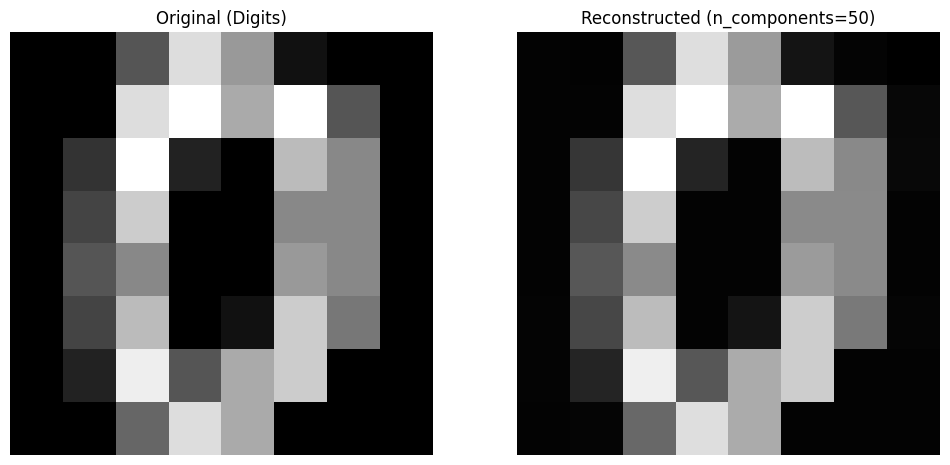

In [4]:
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(images_digits[0], cmap="gray")
plt.title("Original (Digits)")
plt.axis("off")

# Reconstructed Image
plt.subplot(1, 2, 2)
plt.imshow(X_digits_reconstructed[0].reshape(8, 8), cmap="gray")
plt.title(f"Reconstructed (n_components={n_components})")
plt.axis("off")

plt.show()


Faces Dataset (64x64)

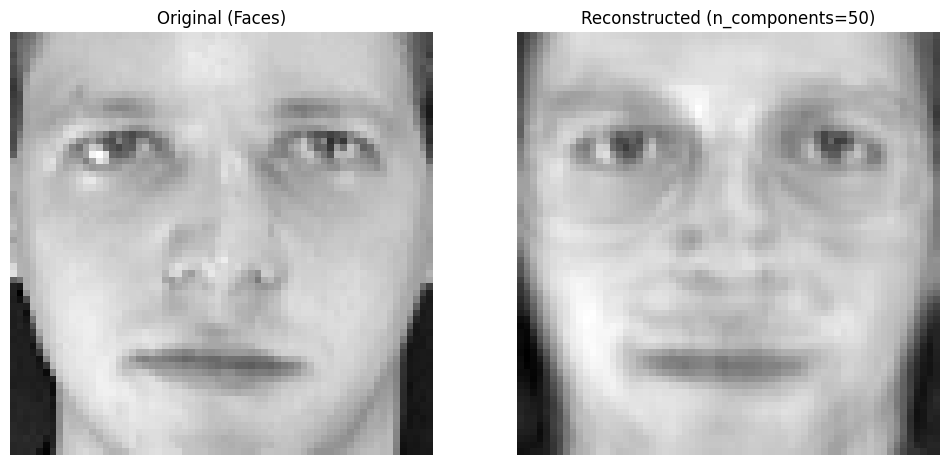

In [5]:
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(images_faces[0], cmap="gray")
plt.title("Original (Faces)")
plt.axis("off")

# Reconstructed Image
plt.subplot(1, 2, 2)
plt.imshow(X_faces_reconstructed[0].reshape(64, 64), cmap="gray")
plt.title(f"Reconstructed (n_components={n_components})")
plt.axis("off")

plt.show()


5.  Plot Compression Quality

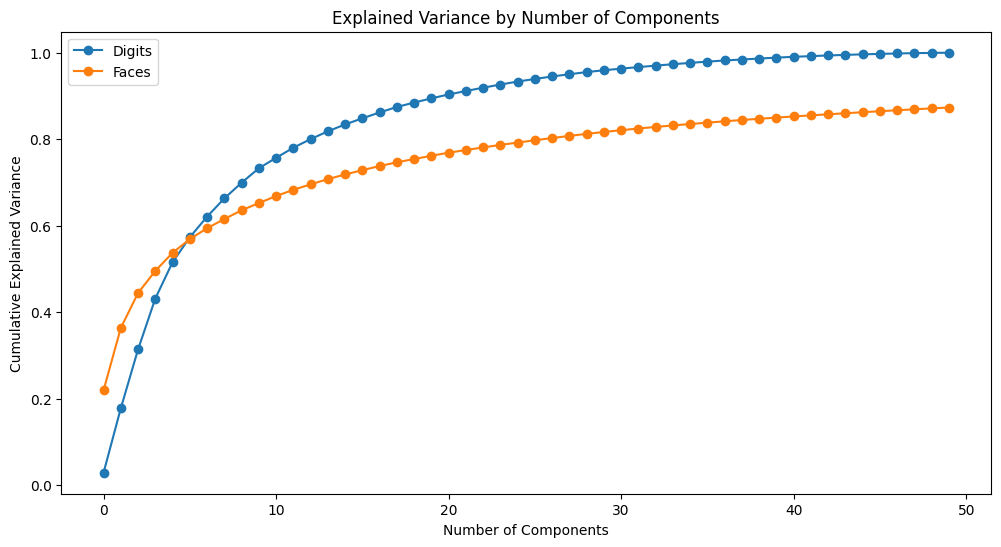

In [6]:
plt.figure(figsize=(12, 6))

# Digits
plt.plot(np.cumsum(svd_digits.explained_variance_ratio_), marker='o', label="Digits")
plt.title("Explained Variance by Number of Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.legend()

# Faces
plt.plot(np.cumsum(svd_faces.explained_variance_ratio_), marker='o', label="Faces")
plt.legend()
plt.show()


The plot above shows the cumulative explained variance as a function of the number of components used in the SVD for Digits and Faces datasets.

Key Observations:
Digits (blue line):
Reaches nearly 100% explained variance with around 40 components, indicating a highly structured and low-dimensional nature.
The curve rises sharply in the first 10 components, capturing the majority of the information quickly.

Faces (orange line):
Reaches about 90% explained variance at 50 components, suggesting it requires more components for accurate reconstruction.
The curve is less steep compared to the Digits, reflecting the complexity and higher variability in facial images.

6. Evaluate the Compression Quality

In [7]:
digits_mse = np.mean((X_digits - X_digits_reconstructed) ** 2)
faces_mse = np.mean((X_faces - X_faces_reconstructed) ** 2)

print(f"Digits - Mean Squared Error: {digits_mse:.4f}")
print(f"Faces - Mean Squared Error: {faces_mse:.4f}")


Digits - Mean Squared Error: 0.0085
Faces - Mean Squared Error: 0.0024


Digits have a slightly higher MSE, despite requiring fewer components to capture most of the variance. This is likely because the digits are more binary and sensitive to small pixel changes.

Faces have a lower MSE, which suggests that even with fewer components, the overall structure and details of faces can be more effectively preserved.

This lower MSE for faces may also reflect the fact that human faces share many common structural features that can be captured more efficiently.